INFO: Aluno RU 2733208 Rodrigo Garcia Fontanela
INFO: Descompacte a pasta 'Fake.br-Corpus-master' em 'C:\Users\Rodrigo' para leitura dos arquivos
INFO: Lendo dados...
INFO: Preparando dados...
INFO: Treinando...
INFO: Acurácia (%):  96.72222222222221
INFO: Nuvem de palavras FAKE:


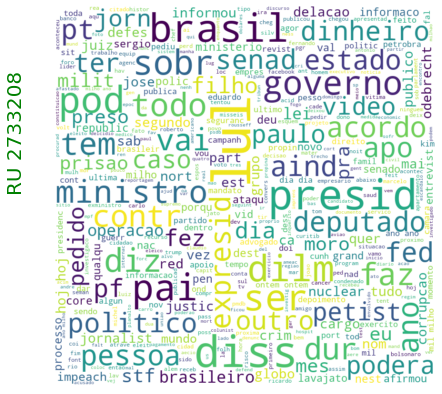

INFO: Total de palavras para FAKE: 20000

INFO: Nuvem de palavras TRUE:


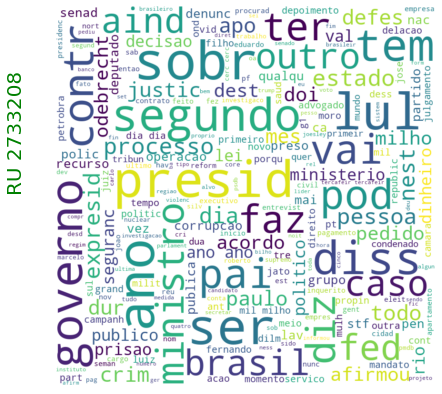

INFO: Total de palavras para TRUE:  20000

INFO: Aluno RU 2733208 Rodrigo Garcia Fontanela finalizou o trabalho.


In [7]:
import unicodedata
import matplotlib.pyplot as plt
import string
import numpy as np
import pandas as pd
import nltk
import os

from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer

from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle

# Criado com Jupyter Notebook. 

"""
Downloads para fazer o trabalho:

!pip install wordcloud
!pip install Tokenizer
!pip install keras
!pip install tensorflow
nltk.download('wordnet')
nltk.download('omw-1.4')
"""

# Os arquivos foram baixados de https://github.com/roneysco/Fake.br-Corpus e 
# descompactados na pasta "working directory" do SO. 

# Faz a leitura de um arquivo e devolve seu conteúdo
def read_file(file): 
    try:
        file = open(file, "r", encoding = 'utf-8')
        return file.read()
    except:
        return ""

# Faz o parse dos metadados das notícias
def parse_metadata(text):
    fields = text.split("\n")
    return { "author": fields[0],
              "link": fields[1],
              "category": fields[2],
              "date_publication": fields[3],
              "number_tokens": int(fields[4]),
              "number_words_without_punctuation": int(fields[5]),
              "number_types": int(fields[6]),
              "number_links_inside_the_news": fields[7],
              "number_words_in_upper_case": int(fields[8]),
              "number_verbs": int(fields[9]),
              "number_subjuntive_and_imperative_verbs": int(fields[10]),
              "number_nouns": int(fields[11]),
              "number_adjectives": int(fields[12]),
              "number_adverbs": int(fields[13]),
              "number_modal_verbs_mainly_auxiliary_verbs": int(fields[14]),
              "number_singular_1st_and_2nd_personal_pronouns": int(fields[15]),
              "number_plural_1st_personal_pronouns": int(fields[16]),
              "number_pronouns": int(fields[17]),
              "pausality": float(fields[18]),
              "number_characters": int(fields[19]),
              "average_sentence_length": float(fields[20]),
              "average_word_length": float(fields[21]),
              "percentage_news_with_speeling_errors": float(fields[22]),
              "emotiveness": float(fields[23]),
              "diversity": float(fields[24]) }

# Adquire, estrutura e normaliza dados
def read_data():    
    dados = []
    base_path = "\\Fake.br-Corpus-master\\full_texts\\"
    
    for label in ['fake', 'true']:  
        path_news = f"{os.getcwd()}{base_path}{label}\\"

        for file in os.listdir(path_news):
            file_name = os.path.splitext(file)[0]        
            full_text = read_file(f"{path_news}{file}")
            path_metadata = f"{os.getcwd()}{base_path}{label}-meta-information\\{file_name}-meta.txt"
            metadata = read_file(path_metadata)        
            dados.append({"file": file_name,
                          "label": label.upper(),
                          "full_text": full_text,
                          "normalized_text": normalize_text(full_text)} | parse_metadata(metadata)) 

    return shuffle(pd.DataFrame(dados)).reset_index(drop = True)

# Remove pontuações, stop words, caracteres especiais e espaços extras e transforma tudo em letras minúsculas
# Também usa um Stemmer Lancaster para obter os radicais das palavras
def normalize_text(text):    
    all_words = ("".join([char for char in text if char not in string.punctuation])).split()
    stop_words = stopwords.words('portuguese')
    lancaster = LancasterStemmer()
    clean_words = " ".join([lancaster.stem(word) for word in all_words if word.lower() not in stop_words])
    return unicodedata.normalize("NFD", clean_words).encode("ascii", "ignore").decode("utf-8").strip().lower()

# Equaliza dados com máximo de 20000 palavras usando TF-IDF para que notícias FAKE/TRUE tenham o mesmo tamanho
# Separa dados de treino (75%) e testes (25%)
def prepare_data(df):
    vectorizer = create_tfidf_vectorizer()
    normalized_text = df['normalized_text']
    X_ru2733208 = vectorizer.fit_transform(normalized_text)
    x_train, x_test, y_train, y_test = train_test_split(X_ru2733208, df['label'], test_size = 0.25, random_state = 42)
    return vectorizer, x_train, x_test, y_train, y_test

# Cria vetorizador TF-IDF com uni e bigramas
def create_tfidf_vectorizer():
    return TfidfVectorizer(sublinear_tf = True, smooth_idf = True, use_idf = True, 
                           max_features = 20000, ngram_range = (1, 2))

# Modelo escolhido foi Regressão Logística
def fit(x_train, y_train):
    model_ru2733208 = LogisticRegression(max_iter = 1000)
    model_ru2733208.fit(x_train, y_train)    
    return model_ru2733208

# Monta a nuvem de palavras 
def show_word_cloud(words):
    model_ru2733208 = WordCloud(width = 800, height = 800, 
                                background_color = 'white', 
                                max_words = 500,
                                max_font_size = 110, 
                                min_font_size = 10).generate(words)
    
    plt.figure(figsize = (10, 7))
    plt.imshow(model_ru2733208, interpolation = 'bilinear')
    plt.axis("off")
    plt.title("RU 2733208", rotation = 'vertical', color = 'green', x = -0.1, y = 0.5, fontsize = 20)
    plt.show()                        

# Filtra texto normalizado conforme o tipo de notícia (TRUE/FAKE)
def filter_normalized_text(df, label):
    return df[df['label'] == label.upper()]['normalized_text']

# Executando o programa   
def main():
    print("INFO: Aluno RU 2733208 Rodrigo Garcia Fontanela")
    print(f"INFO: Descompacte a pasta 'Fake.br-Corpus-master' em '{os.getcwd()}' para leitura dos arquivos")
    print("INFO: Lendo dados...")    
    df = read_data()
    
    print("INFO: Preparando dados...")    
    vectorizer, x_train, x_test, y_train, y_test = prepare_data(df)
    
    print("INFO: Treinando...")  
    model = fit(x_train, y_train)
    
    Accuracy = model.score(x_test, y_test)
    print("INFO: Acurácia (%): ", Accuracy*100)  
    
    vectorizer = create_tfidf_vectorizer()    
    
    print("INFO: Nuvem de palavras FAKE:")
    fakes = filter_normalized_text(df, 'FAKE')
    vectorizer.fit_transform(fakes)
    show_word_cloud(" ".join(vectorizer.get_feature_names_out()))
    
    print("INFO: Total de palavras para FAKE:", len(vectorizer.get_feature_names_out()))
    print()

    print("INFO: Nuvem de palavras TRUE:")
    vectorizer = create_tfidf_vectorizer() 
    trues = filter_normalized_text(df, 'TRUE')
    vectorizer.fit_transform(trues)
    show_word_cloud(" ".join(vectorizer.get_feature_names_out()))
    
    print("INFO: Total de palavras para TRUE: ", len(vectorizer.get_feature_names_out()))
    print()
    
    print("INFO: Aluno RU 2733208 Rodrigo Garcia Fontanela finalizou o trabalho.")

main()
